In [1]:
import pandas as pd
import numpy as np
from pivottablejs import pivot_ui
from playsound import playsound

In [2]:
convo=pd.read_csv('convo.csv')
cosinewordpd=pd.read_csv('cosineword.csv')
cosinewordpd=cosinewordpd.drop(columns=['Unnamed: 0'])
BOWsim=cosinewordpd.columns.values.tolist()
cosinewordpd.index=BOWsim
cosineword=cosinewordpd.values

In [3]:
#functions for cosine similarity of each word
def get_mostsimilar(word):
    cos3=[]
    comps=[(-2,'Most Similar'),(-3,'Second Most Similar'),(-4,'Third Most Similar'),
           (-5,'Forth Most Similar'),(-6,'Fifth Most Similar'),(-7,'Sixth Most Similar')]
    try:
        row=list(cosineword[BOWsim.index(word)])
        for what in comps:
            val=sorted(row)[what[0]]
            idval=row.index(val)
            cos3.append([what[1],BOWsim[idval],val])
        
        return pd.DataFrame(cos3,columns=['compare','word2','val'])
    except:
        return 'word not found'

In [4]:
df=pd.read_csv('working.csv')
dfts=pd.read_excel('WORKING.xlsx')
texts=pd.read_csv('thedataforme.csv')

In [5]:
df=df.drop(columns=['ts','new_ts'])
df=df.merge(dfts[['new_ts']],left_index=True, right_index=True)
del dfts

In [6]:
df['ts']=pd.to_datetime(df['new_ts'])
df=df.drop(columns=['new_ts'])
df['weekday']=df['ts'].dt.dayofweek
df['month']=df['ts'].dt.month
df['hour']=df['ts'].dt.hour

In [7]:
def tabcleaner(string,per):
    out=[]
    mylist=string.split("\n")#split list by enters
    for el in mylist: #split each row by tabs
        row=el.split("\t")
        for i in range(len(row)): #convert string to number
            try:
                row[i]=round(float(row[i]),4)
                if per=='%':
                    row[i]=row[i]*100
            except:
                if row[i]=='':
                    row[i]=0
        out.append(row) #append output list
    hdr=out[0] #columns
    out=out[1:] #everything else
    out=pd.DataFrame(out,columns=hdr)
    return out

In [179]:
pivot_ui(df)

In [9]:
emote='''Person First Name	Questioned	Disliked	Liked	Loved	Emphasized	Laughed	text
Allison	0.0030303030303030303	0.00909090909090909	0.02484848484848485	0.037575757575757575	0.022424242424242423	0.04787878787878788	0.8551515151515151
Ana	0.0021287919105907396	0.0070706302744621	0.05352391089485289	0.02653387059986315	0.02265642819128716	0.08682429863909374	0.8012620694898502
Ben	0.0061633281972265025	0.0015408320493066256	0.04776579352850539	0.01848998459167951	0.04930662557781202	0.06779661016949152	0.8089368258859785
Brandy	0.001199040767386091	0.005995203836930456	0.03597122302158273	0.09892086330935251	0.008992805755395683	0.013189448441247002	0.8357314148681055
Colleen	0.006448265638897124	0.007337681589089831	0.014749481174029055	0.02023421286688408	0.04810257930625556	0.09146160687815001	0.8116661725466944
Geoff	0.006195473511189784	0.02414970287014793	0.029839423441648756	0.029649766089265394	0.062144392464281196	0.15842710835756732	0.6895941332658996
Hannah	0.006242684354272337	0.02262973078423722	0.030433086227077643	0.12290284822473664	0.0647678501755755	0.13265704252828717	0.6203667577058135
Justin	0.004229654578209446	0.013863867784130963	0.029607582047466125	0.0033680582752408554	0.020521657397979165	0.03618704472468082	0.8922221351922926
Katherine		0.01050420168067227	0.0273109243697479	0.17016806722689076	0.11974789915966387	0.18067226890756302	0.49159663865546216
Kenn			0.008583690987124463	0.004291845493562232	0.004291845493562232		0.9828326180257511
Sam	0.002390914524805738	0.01434548714883443	0.07232516437537357	0.09205020920502092	0.06156604901374776	0.15540944411237298	0.6019127316198446
Sarah	0.002522421524663677	0.021580717488789237	0.016255605381165917	0.06838565022421525	0.014854260089686098	0.11491031390134529	0.7614910313901345
Stefani	0.0007208506037123806	0.003964678320418093	0.012254460263110471	0.05280230672193188	0.019643178951162372	0.07208506037123806	0.8385294647684267'''
emotedf=tabcleaner(emote,'%')

avgword="""Person First Name	text
Allison	8.510985116938345
Ana	6.545921277809465
Ben	8.459923664122151
Brandy	5.9174443646805415
Colleen	6.665021478841028
Geoff	7.109489720998538
Hannah	7.538510101010103
Justin	8.206065934065925
Katherine	10.123931623931621
Kenn	7.969298245614033
Sam	7.636182902584492
Sarah	4.706966457795802
Stefani	6.915859694426507"""
avgworddf=tabcleaner(avgword,'')

sent="""Person First Name	Negative	Positive
Allison	0.23736075407026563	0.7626392459297343
Ana	0.2606917069542581	0.7393082930457419
Ben	0.21052631578947367	0.7894736842105263
Brandy	0.25022583559168926	0.7497741644083108
Colleen	0.2596002694812486	0.7403997305187514
Geoff	0.26277632517233185	0.7372236748276681
Hannah	0.23722044728434505	0.762779552715655
Justin	0.2724759369240221	0.7275240630759778
Katherine	0.23157894736842105	0.7684210526315789
Kenn	0.31413612565445026	0.6858638743455497
Sam	0.26947637292464876	0.7305236270753512
Sarah	0.2087737843551797	0.7912262156448203
Stefani	0.2716671084018023	0.7283328915981977"""
sentdf=tabcleaner(sent,'%')

attachmentemote="""Person First Name	1-N	1-Y
Allison	0.460431654676259	0.539568345323741
Ana	0.6552706552706553	0.34472934472934474
Ben	0.42857142857142854	0.5714285714285714
Brandy	0.5434782608695652	0.45652173913043475
Colleen	0.5325248070562293	0.46747519294377065
Geoff	0.6903831118060985	0.3096168881939015
Hannah	0.4489795918367347	0.5510204081632652
Justin	0.6248175182481752	0.37518248175182483
Katherine	0.1935483870967742	0.8064516129032258
Kenn	0.4782608695652174	0.5217391304347826
Sam	0.3248407643312102	0.6751592356687898
Sarah	0.6833333333333333	0.31666666666666665
Stefani	0.7405764966740577	0.25942350332594233"""
attachmentemotedf=tabcleaner(attachmentemote,'%')

convosum="""Person First Name	Convo End	Convo Start	Crickets	Engager	text
Allison	0.05102763997165131	0.16654854712969524	0.024096385542168676	0.09142452161587526	0.6669029057406095
Ana	0.03653098016889648	0.10228674447291014	0.016415219660309326	0.05683651200303634	0.7879305436948477
Ben	0.03238095238095238	0.11428571428571428	0.02857142857142857	0.07809523809523809	0.7466666666666667
Brandy	0.05667144906743185	0.16212338593974174	0.027259684361549498	0.08464849354375897	0.669296987087518
Colleen	0.054880832800657475	0.06839558031230025	0.014245274404164003	0.049219249383617936	0.8132590630992603
Geoff	0.05454712137880455	0.09965163182984965	0.015493215988265493	0.07004033736707003	0.7602676934360103
Hannah	0.04213836477987421	0.1559748427672956	0.0389937106918239	0.0660377358490566	0.6968553459119496
Justin	0.04240189623386884	0.057325959090510054	0.008515494688789395	0.05987182863664296	0.8318848213501887
Katherine	0.038461538461538464	0.17094017094017094	0.021367521367521368	0.038461538461538464	0.7307692307692307
Kenn	0.034934497816593885	0.11790393013100436	0.013100436681222706	0.06986899563318777	0.7641921397379913
Sam	0.031777557100297914	0.21449851042701093	0.038728897715988086	0.07646474677259185	0.6385302879841113
Sarah	0.061832903938167094	0.1589988958410011	0.04195804195804196	0.1034228928965771	0.6337872653662128
Stefani	0.026219643240919837	0.04212336127229744	0.0027938964109176876	0.03137760584569095	0.8974854932301741"""
convosumdf=tabcleaner(convosum,'%')

attachment="""Person First Name	0	1
Allison	0.9014883061658399	0.09851169383416017
Ana	0.8667805294619982	0.1332194705380017
Ben	0.96	0.04
Brandy	0.9010043041606887	0.09899569583931134
Colleen	0.9171765135604054	0.08282348643959455
Geoff	0.8827466079941327	0.11725339200586725
Hannah	0.8767295597484277	0.12327044025157233
Justin	0.9398648055482398	0.06013519445176016
Katherine	0.8675213675213675	0.13247863247863248
Kenn	0.8995633187772926	0.10043668122270742
Sam	0.8440913604766633	0.15590863952333664
Sarah	0.9116672800883327	0.08833271991166727
Stefani	0.9030732860520094	0.09692671394799054"""
attachmentdf=tabcleaner(attachment,'%')

receiveemote="""Person First Name	N	Y
Allison	0.7002126151665485	0.29978738483345146
Ana	0.8109698234959195	0.18903017650408046
Ben	0.6533333333333333	0.3466666666666667
Brandy	0.7898134863701578	0.21018651362984217
Colleen	0.8255707762557077	0.17442922374429223
Geoff	0.8036303630363036	0.19636963696369636
Hannah	0.6880503144654088	0.3119496855345912
Justin	0.8080941093846019	0.19190589061539812
Katherine	0.6794871794871795	0.32051282051282054
Kenn	0.7074235807860262	0.2925764192139738
Sam	0.6444885799404171	0.3555114200595829
Sarah	0.8432094221567906	0.15679057784320943
Stefani	0.8676122931442081	0.13238770685579196"""
receiveemotedf=tabcleaner(receiveemote,'%')


In [10]:
#getting them ready for questions!
Q0=avgworddf.sort_values(by=['text'], ascending=False)
Q0['Score']=Q0['text']*10
Q0=Q0[['Person First Name','Score','text']]
Q0.columns=['Person First Name','Score','Average Words per Text']
Q0=Q0.reset_index(drop=True)
Q0.index=Q0.index+1

emotedf['emote']=100-emotedf['text']
Q1=emotedf[['Person First Name','emote','text']]
Q1=Q1.sort_values(by=['emote'], ascending=False)
Q1.columns=['Person First Name','Emote Percentage','Text Percentage']
Q1=Q1.reset_index(drop=True)
Q1.index=Q1.index+1

Q2=sentdf.sort_values(by=['Positive'], ascending=False)
Q2.columns=['Person First Name','Negative Messages Percentage','Positive Messages Percentage']
Q2=Q2[['Person First Name','Positive Messages Percentage','Negative Messages Percentage']]
Q2=Q2.reset_index(drop=True)
Q2.index=Q2.index+1

Q3=attachmentemotedf[['Person First Name','1-Y','1-N']]
Q3=Q3.sort_values(by=['1-Y'], ascending=False)
Q3.columns=['Person First Name','Attachment w/ Emote Percentage','No w/out Emote Percentage']
Q3=Q3.reset_index(drop=True)
Q3.index=Q3.index+1

Q4=convosumdf[['Person First Name','Convo Start']]
Q4=Q4[['Person First Name','Convo Start']]
Q4=Q4.sort_values(by=['Convo Start'], ascending=False)
Q4.columns=['Person First Name','Convo Start Percentage']
Q4=Q4.reset_index(drop=True)
Q4.index=Q4.index+1

Q5=attachmentdf[['Person First Name',100,0]]
Q5=Q5.sort_values(by=[100], ascending=False)
Q5.columns=['Person First Name','Text w/ Attachment Percentage','Text w/out Attachment Percentage']
Q5=Q5.reset_index(drop=True)
Q5.index=Q5.index+1
Q5

Q6=receiveemotedf[['Person First Name','Y','N']]
Q6=Q6.sort_values(by=['Y'],ascending=False)
Q6.columns=['Person First Name','Text w/ Emote Percentage','Text w/out Emote Percentage']
Q6=Q6.reset_index(drop=True)
Q6.index=Q6.index+1

In [11]:
PEOPLE=attachmentdf[['Person First Name']]
fnl=[]
def getresults():
    return pd.DataFrame(fnl,columns=['Team','Answer','Points']).groupby('Team').sum()

In [12]:
#avgworddf
#Qs=[emotedf,sentdf,attachmentemotedf,convosumdf,attachmentdf,receiveemotedf]
Qs=[

[Q1,'Emote vs Text'],
[Q2,'Sentiment Analysis'],
[Q3,'Attachments with/without Emotes'],
[Q4,'Starting Converstations'],
[Q5,'Text with Attachment'],
[Q6,'Text with/without Emote']
]

In [13]:
def Question(data):
    from ipywidgets import widgets, Label
    from IPython.display import display, clear_output
    #making my widgets
    team1 = widgets.Text(description="Team 1!")
    team2 = widgets.Text(description="Team 2!")
    button=widgets.Button(description="FUCK")
    undo=widgets.Button(description="UNFUCK")
    done=widgets.Button(description="DONE")
    box=widgets.HBox(children=[team1,team2,button,undo,done])
    Scoreboard=[]
    results=[]
    resultsdf=[]

    def btn(b):
        playsound('survey1.mp3')
        clear_output()
        display(box)
        if team1.value in PEOPLE.values.flatten(): #if answer is in list, then get points
            results.append(team1.value)
            team1ans=data[data['Person First Name']==team1.value].values[0][1]
        else:
            team1ans=0 #if answer is invalid, give 0

        if team2.value in PEOPLE.values.flatten(): #if answer is in list, then get points
            results.append(team2.value)
            team2ans=data[data['Person First Name']==team2.value].values[0][1]
        else:
            team2ans=0 #if answer is invalid, give 0
            
        resultsdf=data[data['Person First Name'].isin(results)]
        display(Label('Answers:'))
        display(resultsdf)
        Scoreboard.append(['Team 1',team1.value,team1ans]) #getting results values!
        Scoreboard.append(['Team 2',team2.value,team2ans]) #getting results values!
        display(Label('Team Score:'))
        display(pd.DataFrame(Scoreboard,columns=['Team','Answer','Points']))
        team1.value='' #resetting text boxes
        team2.value=''
        playsound('survey2.mp3')
        
    #in case i push the wrong button, I can undo the scoreboard
    def undobtn(b):
        del Scoreboard[-1] #remove the last two results
        del Scoreboard[-1]
        clear_output()
        display(box)
        resultsdf=data[data['Person First Name'].isin(results)]
        display(Label('Answers:'))
        display(resultsdf)
        display(Label('Team Score:'))
        display(pd.DataFrame(Scoreboard,columns=['Team','Answer','Points']))
    def GETSCORE(b):
        clear_output()
        for el in Scoreboard:
            fnl.append(el)
        display(Label('Answers:'))
        display(data)
        display(Label('Score:'))
        display(getresults())
        playsound('survey4.mp3')
    button.on_click(btn)
    undo.on_click(undobtn)
    done.on_click(GETSCORE)
    return display(box)

In [14]:
def Words():
    from ipywidgets import widgets, Label
    from IPython.display import display, clear_output
    import time
    #making my widgets
    WORD = widgets.Text(description="Start Word!")
    word1 = widgets.Text(description="Team 1!")
    word2 = widgets.Text(description="Team 2!")
    undo=widgets.Button(description="UNFUCK")
    done=widgets.Button(description="DONE")
    button1=widgets.Button(description="Team 1 FUCK")
    button2=widgets.Button(description="Team 2 FUCK")
    #undo=widgets.Button(description="UNFUCK")
    #done=widgets.Button(description="DONE")
    box1=widgets.HBox(children=[word1,button1,undo,done])
    box2=widgets.HBox(children=[word2,button2,undo,done])

    Scoreboard=[]

    def wordcompare1(b):
        clear_output()
        display(WORD,box1,box2)
        #display(pd.DataFrame(Scoreboard,columns=['Team','Answer','Points']))
        playsound('survey1.mp3')
        try:
            row=list(cosineword[BOWsim.index(WORD.value)])
            id1=BOWsim.index(word1.value)
            time.sleep(.3)
            val1=row[id1]
            val1=round(val1,4)*100
            Scoreboard.append(['Team 1',word1.value,val1]) #getting results values!
            display(Label('Team Score:'))
            display(pd.DataFrame(Scoreboard,columns=['Team','Answer','Points']))
            playsound('survey2.mp3')
            word1.value='' #resetting text boxes
        except:
            val1=0
            time.sleep(.3)
            Scoreboard.append(['Team 1',word1.value,val1]) #getting results values!
            display(Label('Team Score:'))
            display(pd.DataFrame(Scoreboard,columns=['Team','Answer','Points']))
            playsound('survey5.mp3')
        
    def wordcompare2(b):
        clear_output()
        display(WORD,box1,box2)
        #display(pd.DataFrame(Scoreboard,columns=['Team','Answer','Points']))
        playsound('survey1.mp3')
        try:
            row=list(cosineword[BOWsim.index(WORD.value)])
            id2=BOWsim.index(word2.value)
            time.sleep(.3)
            val2=row[id2]
            val2=round(val2,4)*100
            Scoreboard.append(['Team 2',word2.value,val2]) #getting results values!
            display(Label('Team Score:'))
            display(pd.DataFrame(Scoreboard,columns=['Team','Answer','Points']))
            playsound('survey2.mp3')
            word2.value='' #resetting text boxes
        except:
            val2=0
            time.sleep(.3)
            Scoreboard.append(['Team 2',word2.value,val2]) #getting results values!
            display(Label('Team Score:'))
            display(pd.DataFrame(Scoreboard,columns=['Team','Answer','Points']))
            playsound('survey5.mp3')

    #in case i push the wrong button, I can undo the scoreboard
    def undobtn(b):
        del Scoreboard[-1] #remove the last two results
        clear_output()
        display(box1,box2)
        display(Label('Team Score:'))
        display(pd.DataFrame(Scoreboard,columns=['Team','Answer','Points']))
    def GETSCORE(b):
        clear_output()
        for el in Scoreboard:
            fnl.append(el)
        display(Label('Word:'))
        display(WORD)
        display(Label('Most Similar:'))
        display(get_mostsimilar(WORD.value))
        display(Label('Score:'))
        display(getresults())
        playsound('survey4.mp3')

    button1.on_click(wordcompare1)
    button2.on_click(wordcompare2)
    undo.on_click(undobtn)
    done.on_click(GETSCORE)
    return display(WORD,box1,box2)

# Lifeguard Family Feud

A Gameshow on our group messages!


Hosted by the NOTORIOUS Sammy-Dizzle

# How to play

- I will give everyone a question. Each team gives a person they think answers the question best!
- For example: "Which person is most likely to start a conversation?"
- The closer you are to the right answer, the more points you'll get!
- Each question last's for three rounds
- This means you get three opportunities to get points!
- You cannot answer the same person twice, but both teams may guess the same person in the same round


# Question 1

## Emotes Vs Texts

A person can either send a text message, or they can send an emote! (like, dislike, heart, etc).

Can you guess the person with the highest percentage of emotes?

In [16]:
Question(Qs[0][0])

Label(value='Answers:')

,Person First Name,Emote Percentage,Text Percentage
1,Katherine,50.84,49.16
2,Sam,39.81,60.19
3,Hannah,37.96,62.04
4,Geoff,31.04,68.96
5,Sarah,23.85,76.15
6,Ana,19.87,80.13
7,Ben,19.11,80.89
8,Colleen,18.83,81.17
9,Brandy,16.43,83.57
10,Stefani,16.15,83.85


Label(value='Score:')

,Points
Team,
Team 1,88.11
Team 2,81.68


# Question 2

## Sentiment Analysis

#### A person's text can be positive, or negative! 

Example: A message like "I hate you" will be classified as a negative message, while something like "I love you" will be classified as positive.

Can you guess the person with the highest percentage of positive messages?

In [17]:
Question(Qs[1][0])

Label(value='Answers:')

,Person First Name,Positive Messages Percentage,Negative Messages Percentage
1,Sarah,79.12,20.88
2,Ben,78.95,21.05
3,Katherine,76.84,23.16
4,Hannah,76.28,23.72
5,Allison,76.26,23.74
6,Brandy,74.98,25.02
7,Colleen,74.04,25.96
8,Ana,73.93,26.07
9,Geoff,73.72,26.28
10,Sam,73.05,26.95


Label(value='Score:')

,Points
Team,
Team 1,311.18
Team 2,302.16


# Question 3

## Attachments with and without Emotes

#### Sometimes we send texts that have attachments. And sometimes, people react to those messages!

Can you guess the person who receives the highest percentage of emotes for the attachments they send?

Basically, who sends the funniest attachments!

In [19]:
Question(Qs[2][0])

Label(value='Answers:')

,Person First Name,Attachment w/ Emote Percentage,No w/out Emote Percentage
1,Katherine,80.65,19.35
2,Sam,67.52,32.48
3,Ben,57.14,42.86
4,Hannah,55.10,44.90
5,Allison,53.96,46.04
6,Kenn,52.17,47.83
7,Colleen,46.75,53.25
8,Brandy,45.65,54.35
9,Justin,37.52,62.48
10,Ana,34.47,65.53


Label(value='Score:')

,Points
Team,
Team 1,468.44
Team 2,459.37


# Question 4

## Starting Conversations

#### A text conversation has got to be started by someone! You can either start a conversation, or don't!

Can you guess the person who starts the most conversations (by percentage)?

In [20]:
Question(Qs[3][0])

Label(value='Answers:')

,Person First Name,Convo Start Percentage
1,Sam,21.45
2,Katherine,17.09
3,Allison,16.65
4,Brandy,16.21
5,Sarah,15.90
6,Hannah,15.60
7,Kenn,11.79
8,Ben,11.43
9,Ana,10.23
10,Geoff,9.97


Label(value='Score:')

,Points
Team,
Team 1,512.71
Team 2,490.91


# Question 5

## Texts with Attachments

####  Sometimes we send texts that have attachments!

Can you guess the person who sends the most texts with attachments (by percentage)?

In [21]:
Question(Qs[4][0])

Label(value='Answers:')

,Person First Name,Text w/ Attachment Percentage,Text w/out Attachment Percentage
1,Sam,15.59,84.41
2,Ana,13.32,86.68
3,Katherine,13.25,86.75
4,Hannah,12.33,87.67
5,Geoff,11.73,88.27
6,Kenn,10.04,89.96
7,Brandy,9.90,90.10
8,Allison,9.85,90.15
9,Stefani,9.69,90.31
10,Sarah,8.83,91.17


Label(value='Score:')

,Points
Team,
Team 1,551.66
Team 2,521.97


# Question 6

## Texts with or without an emote

####  Lets face it! Some people just send better messages than others

Can you guess the person who receives the most reactions (by percentage)?

In [22]:
Question(Qs[5][0])

Label(value='Answers:')

,Person First Name,Text w/ Emote Percentage,Text w/out Emote Percentage
1,Sam,35.55,64.45
2,Ben,34.67,65.33
3,Katherine,32.05,67.95
4,Hannah,31.19,68.81
5,Allison,29.98,70.02
6,Kenn,29.26,70.74
7,Brandy,21.02,78.98
8,Geoff,19.64,80.36
9,Justin,19.19,80.81
10,Ana,18.90,81.10


Label(value='Score:')

,Points
Team,
Team 1,653.93
Team 2,617.95


# Final Feud!

Some words are more similar than others. One way to determine their similarity is to find what words are used most frequently together! 

#### Be aware: I only kept the top 3,000 words!
- First, I broke the data up by conversations. 
- Then, I counted how many times each word appeared in each conversation.

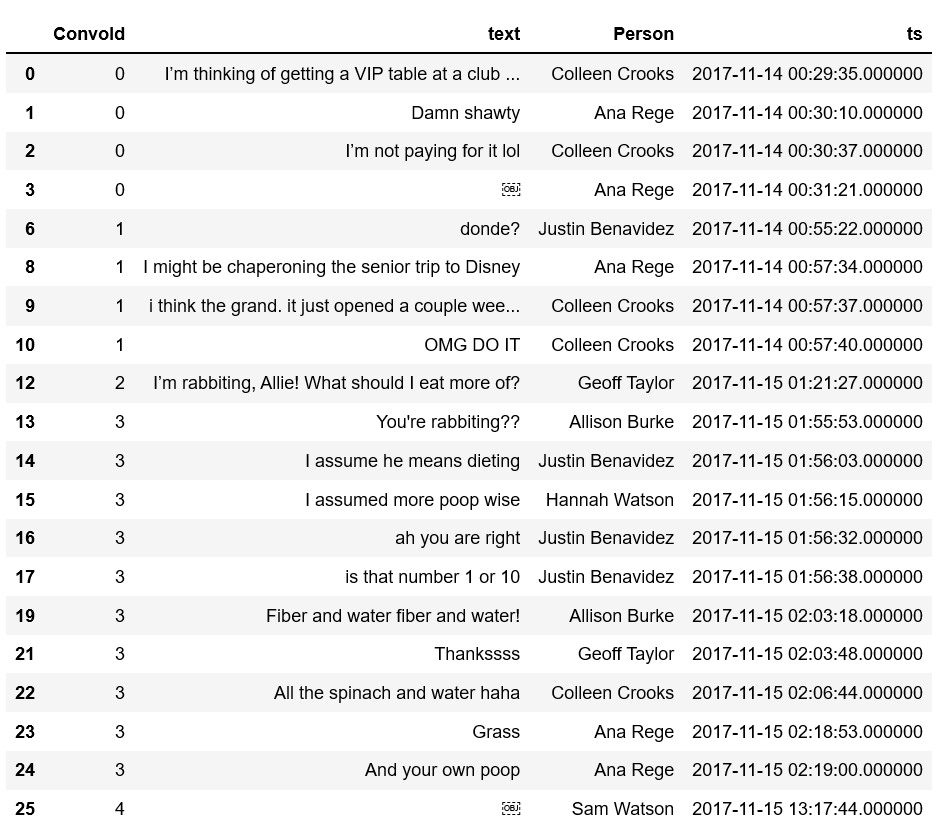

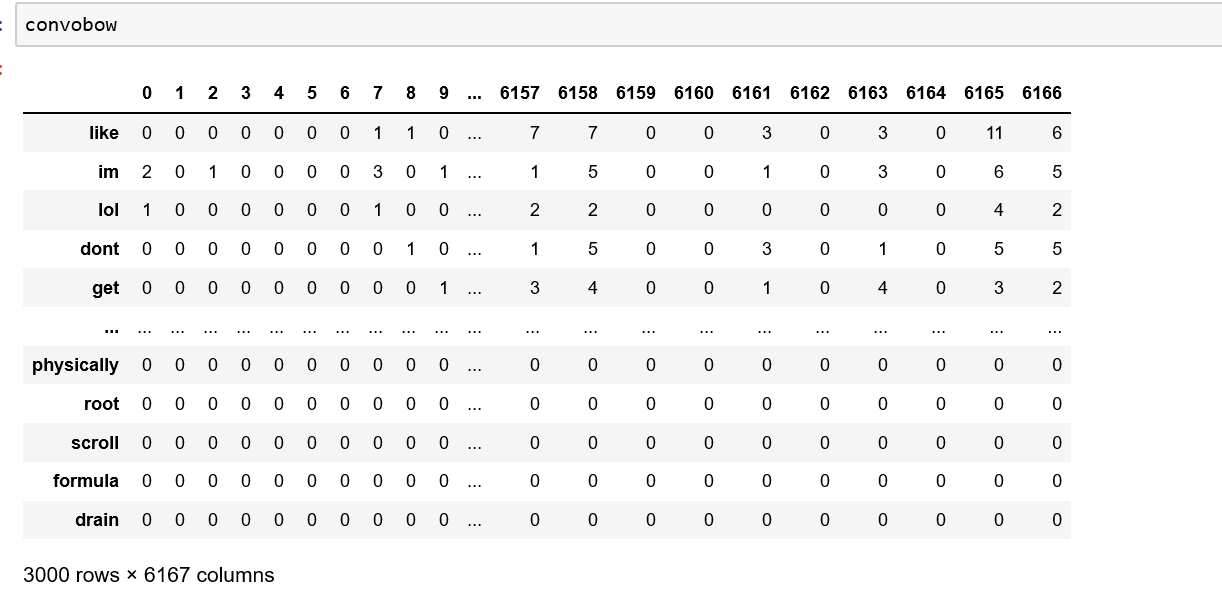

#### The word "like" appears in conversation 6157 a total of 7 times! Now that we have a numerical representation of the words, we can mathematically measure how similar the row of numbers are to eachother 

In [178]:
#Some Examples!
word='ass'
get_mostsimilar(word)

,compare,word2,val
0,Most Similar,roll,0.578521
1,Second Most Similar,screaming,0.571080
2,Third Most Similar,troll,0.564849
3,Forth Most Similar,yo,0.541503
4,Fifth Most Similar,bitch,0.532115
5,Sixth Most Similar,fucking,0.530924


# How to play

- Similar to before! 
- I will give you a word. Each team will guess a word they think is closest to it!
- The closer in similarity the word is, the more points you'll get!
- If the word you give isn't in the top 3,000 words, then you get 0 points!

In [38]:
Words()

Label(value='Word:')

Text(value='cersei', description='Start Word!')

Label(value='Most Similar:')

,compare,word2,val
0,Most Similar,arya,0.906401
1,Second Most Similar,tyrion,0.903458
2,Third Most Similar,dany,0.900225
3,Forth Most Similar,jaime,0.898992
4,Fifth Most Similar,prophecy,0.898252
5,Sixth Most Similar,ghost,0.891854


Label(value='Score:')

,Points
Team,
Team 1,1246.95
Team 2,1178.43


In [28]:
getresults()

,Points
Team,
Team 1,519.90
Team 2,494.91
